In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-zipcode-database/zip_code_database.csv


In [2]:
USzip = pd.read_csv('../input/us-zipcode-database/zip_code_database.csv')

In [3]:
USzip

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population_2015
0,501,UNIQUE,0,Holtsville,NaN,I R S Service Center,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,0
2,601,STANDARD,0,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas Municipio,America/Puerto_Rico,"787,939",NaN,US,18.16,-66.72,0
3,602,STANDARD,0,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,Aguada Municipio,America/Puerto_Rico,"787,939",NaN,US,18.38,-67.18,0
4,603,STANDARD,0,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla Municipio,America/Puerto_Rico,787,NaN,US,18.43,-67.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42627,99926,PO BOX,0,Metlakatla,NaN,NaN,AK,Prince of Wales-Outer Ketchikan Borough,America/Metlakatla,907,NaN,US,55.14,-131.49,1140
42628,99927,PO BOX,0,Point Baker,NaN,NaN,AK,Prince of Wales-Hyder Census Area,America/Sitka,907,NaN,US,56.30,-133.57,48
42629,99928,PO BOX,0,Ward Cove,NaN,NaN,AK,Ketchikan Gateway Borough,America/Sitka,907,NaN,US,55.45,-131.79,1530
42630,99929,PO BOX,0,Wrangell,NaN,NaN,AK,Wrangell City and Borough,America/Sitka,907,NaN,US,56.41,-131.61,2145


In [4]:
USzip1 = USzip[["zip","latitude", "longitude", "state"]]
USzip1.head()

,zip,latitude,longitude,state
0,501,40.81,-73.04,NY
1,544,40.81,-73.04,NY
2,601,18.16,-66.72,PR
3,602,18.38,-67.18,PR
4,603,18.43,-67.15,PR


In [5]:
USzip1.drop(USzip1.loc[USzip1['state']=='PR'].index, inplace=True)
USzip1.drop(USzip1.loc[USzip1['state']=='HI'].index, inplace=True)
USzip1.drop(USzip1.loc[USzip1['state']=='GU'].index, inplace=True)
USzip1.drop(USzip1.loc[USzip1['state']=='AK'].index, inplace=True)
USzip1.drop(USzip1.loc[USzip1['state']=='VI'].index, inplace=True)
USzip1.drop(USzip1.loc[USzip1['state']=='MP'].index, inplace=True)
USzip1.drop(USzip1.loc[USzip1['state']=='AS'].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(24.0, 50.0)

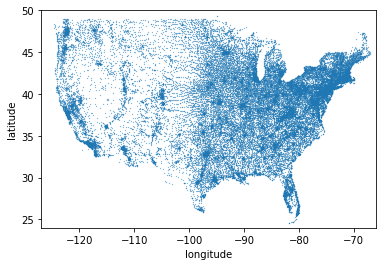

In [6]:
USzip1.plot.scatter( y='latitude', x='longitude', s=.05)
axes = plt.gca()
axes.set_xlim([-127,-66])
axes.set_ylim([24,50])

In [7]:
USzip2 = USzip[["zip","state", "primary_city", "irs_estimated_population_2015"]]
USzip2.head

<bound method NDFrame.head of          zip state primary_city  irs_estimated_population_2015
0        501    NY   Holtsville                            562
1        544    NY   Holtsville                              0
2        601    PR     Adjuntas                              0
3        602    PR       Aguada                              0
4        603    PR    Aguadilla                              0
...      ...   ...          ...                            ...
42627  99926    AK   Metlakatla                           1140
42628  99927    AK  Point Baker                             48
42629  99928    AK    Ward Cove                           1530
42630  99929    AK     Wrangell                           2145
42631  99950    AK    Ketchikan                            262

[42632 rows x 4 columns]>

In [8]:
USzip2.isnull().sum()

zip                              0
state                            0
primary_city                     0
irs_estimated_population_2015    0
dtype: int64

In [9]:
USzip3= USzip2.dropna()

In [10]:
USziptop = USzip3.sort_values(by='irs_estimated_population_2015', ascending=False).head(10).set_index([pd.Index([1,2,3,4,5,6,7,8,9,10])])
USziptop

,zip,state,primary_city,irs_estimated_population_2015
1,60629,IL,Chicago,114420
2,11220,NY,Brooklyn,111430
3,77449,TX,Katy,109280
4,8701,NJ,Lakewood,105330
5,77494,TX,Katy,104450
6,79936,TX,El Paso,103850
7,90650,CA,Norwalk,101180
8,11368,NY,Corona,100270
9,93033,CA,Oxnard,98770
10,77084,TX,Houston,98020
